## SHAP Explanation


In [1]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#import model from data-prediction.ipynb
import joblib
xgb_model = joblib.load('../assets/xgb_model.pkl')

#load data
X = pd.read_csv('../assets/X.csv')
X



,Age,Gender,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Main_meals_count,Food_between_meals_freq,Smokes,Water_consumption,Monitors_calories,Physical_activity,Screen_time,Alcohol_consumption_freq,Transportation_mode,Obesity_level
0,21,1,1,0,1,1,1,0,1,0,0,1,0,4,1
1,21,1,1,0,3,1,1,1,2,1,4,0,1,4,1
2,23,0,1,0,1,1,1,0,1,0,3,1,2,4,1
3,27,0,0,0,3,1,1,0,1,0,3,0,2,1,2
4,22,0,0,0,1,0,1,0,1,0,0,0,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,1,1,1,3,1,1,0,1,0,3,1,1,4,6
2107,22,1,1,1,3,1,1,0,1,0,2,1,1,4,6
2108,23,1,1,1,3,1,1,0,1,0,2,1,1,4,6
2109,24,1,1,1,3,1,1,0,2,0,2,1,1,4,6


In [78]:
X["Gender"] = X["Gender"].astype("category").cat.rename_categories({"Female": 1, "Male": 0})
X["Gender"] = X["Gender"].astype(int)

X["Family_history_overweight"] = X["Family_history_overweight"].astype(int)
X["High_caloric_food"] = X["High_caloric_food"].astype(int)
X["Smokes"] = X["Smokes"].astype(int)
X["Monitors_calories"] = X["Monitors_calories"].astype(int)

X["Alcohol_consumption_freq"] = X["Alcohol_consumption_freq"].astype("category").cat.rename_categories({"Sometimes": 1, "Frequently": 2, "no": 0, "Always": 3})
X["Alcohol_consumption_freq"] = X["Alcohol_consumption_freq"].astype(int)

X["Physical_activity"] = X["Physical_activity"].astype("category").cat.rename_categories({"I do not": 0, "1 or 2 days": 2, "2 or 4 days": 3, "4 or 5 days": 4})
X["Physical_activity"] = X["Physical_activity"].astype(int)

X["Veggie_consumption_freq"] = X["Veggie_consumption_freq"].astype("category").cat.rename_categories({"Sometimes": 1, "Frequently": 2, "Never": 0, "Always": 3})
X["Veggie_consumption_freq"] = X["Veggie_consumption_freq"].astype(int)

X["Main_meals_count"] = X["Main_meals_count"].astype("category").cat.rename_categories({"Between 1 and 2": 0, "Three" : 1, "More than three": 2})
X["Main_meals_count"] = X["Main_meals_count"].astype(int)

X["Food_between_meals_freq"] = X["Food_between_meals_freq"].astype("category").cat.rename_categories({"Sometimes": 1, "Frequently": 2, "no": 0, "Always": 3})
X["Food_between_meals_freq"] = X["Food_between_meals_freq"].astype(int)

X["Water_consumption"] = X["Water_consumption"].astype("category").cat.rename_categories({"Less than a liter": 0, "Between 1 and 2 L": 1, "More than 2 L": 2})
X["Water_consumption"] = X["Water_consumption"].astype(int)

X["Screen_time"] = X["Screen_time"].astype("category").cat.rename_categories({"0-2 hours": 0, "3-5 hours": 1, "More than 5 hours": 2})
X["Screen_time"] = X["Screen_time"].astype(int)

X["Transportation_mode"] = X["Transportation_mode"].astype("category").cat.rename_categories({"Automobile": 5, "Public_Transportation": 4, "Motorbike": 3, "Bike": 2, "Walking": 1})
X["Transportation_mode"] = X["Transportation_mode"].astype(int)

X["Obesity_level"] = X["Obesity_level"].map({"Insufficient_Weight": 0,
                               "Normal_Weight": 1,
                               "Overweight_Level_I": 2,
                               "Overweight_Level_II": 3,
                               "Obesity_Type_I": 4,
                               "Obesity_Type_II": 5,
                               "Obesity_Type_III": 6})

X

,Age,Gender,Family_history_overweight,High_caloric_food,Veggie_consumption_freq,Main_meals_count,Food_between_meals_freq,Smokes,Water_consumption,Monitors_calories,Physical_activity,Screen_time,Alcohol_consumption_freq,Transportation_mode,Obesity_level
0,21,1,1,0,1,1,1,0,1,0,0,1,0,4,1
1,21,1,1,0,3,1,1,1,2,1,4,0,1,4,1
2,23,0,1,0,1,1,1,0,1,0,3,1,2,4,1
3,27,0,0,0,3,1,1,0,1,0,3,0,2,1,2
4,22,0,0,0,1,0,1,0,1,0,0,0,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,21,1,1,1,3,1,1,0,1,0,3,1,1,4,6
2107,22,1,1,1,3,1,1,0,1,0,2,1,1,4,6
2108,23,1,1,1,3,1,1,0,1,0,2,1,1,4,6
2109,24,1,1,1,3,1,1,0,2,0,2,1,1,4,6


In [84]:

array_y = X.Obesity_level
array_X = X.drop("Obesity_level", axis=1)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    array_X, array_y, test_size=0.2, random_state=20250928, stratify=array_y
)

print("Shape of training set\t", X_train.shape, y_train.shape)
print("Shape of test set\t", X_test.shape, y_test.shape)

Shape of training set	 (1688, 14) (1688,)
Shape of test set	 (423, 14) (423,)


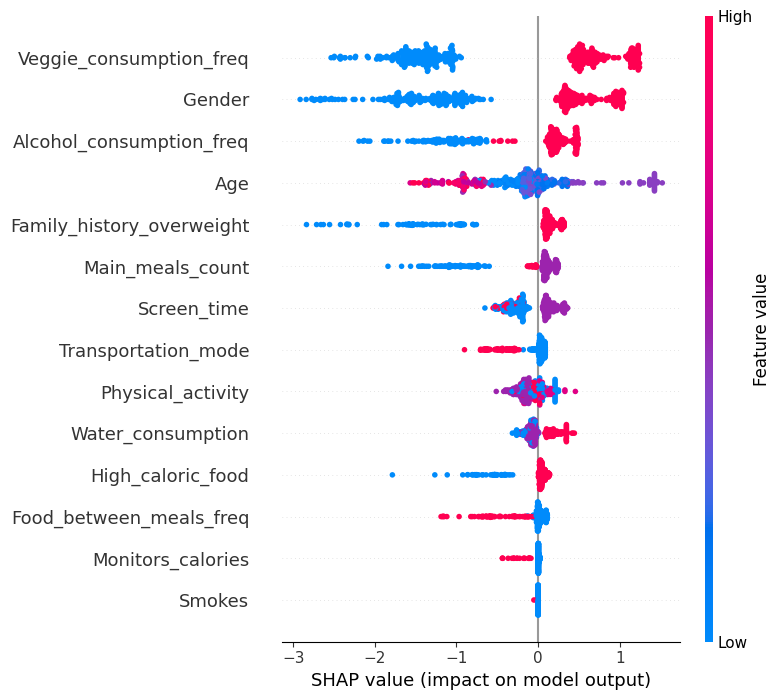

In [85]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
# Plot SHAP values for the most obese class (class 6, index 6)
shap.summary_plot(shap_values[:, :, 6], X_test)

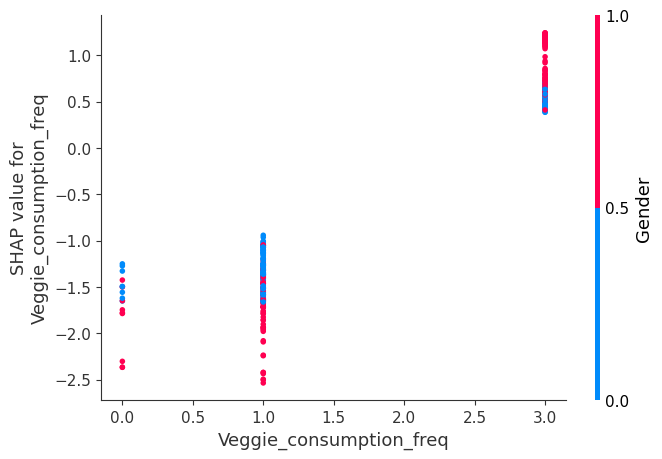

In [ ]:
shap.dependence_plot("Veggie_consumption_freq", shap_values[:, :, 6], X_test,interaction_index="Gender")
#Female = 1, Male = 0

